# creating the game_library dataframe

In [5]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'env'

In [ ]:
game_library = pd.read_json("game_library.json")

In [ ]:
#game_library.shape

# Explore Part 1 (ignore)

# the dataframe

In [ ]:
game_library.head()

In [ ]:
# Genre 

# What genre are most common in this dataset ?

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
game_library.genres.value_counts()

In [ ]:
to_1D(game_library["genres"])


In [ ]:
to_1D(game_library["genres"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["genres"]).value_counts().iloc[:4].index,
        to_1D(game_library["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)



In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

In [ ]:
#sns.countplot(x='genres', data=game_library)b

# What themes are most common in this dataset 

In [ ]:
to_1D(game_library["themes"])

In [ ]:
to_1D(game_library["themes"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (16,4))
ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
        to_1D(game_library["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

In [ ]:
game_library.head(3)

In [ ]:
pd.set_option('display.max_columns', None)
game_library.head(3)

In [ ]:
game_library.themes.value_counts()

#   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

# In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

In [ ]:
game_library.version_title.value_counts()

# What are the most common platforms ?

In [ ]:
game_library.platforms.value_counts()

In [ ]:
to_1D(game_library["platforms"])

In [ ]:
to_1D(game_library["platforms"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:
game_library.head()

In [ ]:
to_1D(game_library["rating"])

In [ ]:
game_library.rating.value_counts()

In [ ]:
game_library.rating_count.value_counts()

In [ ]:
game_library.total_rating.value_counts()

In [ ]:
game_library.shape

In [ ]:
#game_library.info()

# splitting the data

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [ ]:
#this is the dataframe that ONLY has ratings 
df2 = game_library[game_library['rating'].notnull()]
df2


In [ ]:
df2.shape

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
#df2.head()

In [ ]:
#df2.to_json("explore_game_library.json")

> dont forget to bin the data

In [ ]:
df2['rating_bin'] = pd.cut(df2.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


In [ ]:

pd.set_option('display.max_columns', 500)
df2.head()

> splitting the data

# Exploration 

In [2]:
df2 = pd.read_json("explore_game_library.json")

NameError: name 'pd' is not defined

In [1]:
df2.head()

NameError: name 'df2' is not defined

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158644 entries, 16 to 422418
Data columns (total 72 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       158644 non-null  int64         
 1   category                 158644 non-null  int64         
 2   created_at               158644 non-null  datetime64[ns]
 3   external_games           158416 non-null  object        
 4   first_release_date       156393 non-null  float64       
 5   genres                   158644 non-null  object        
 6   name                     158644 non-null  object        
 7   platforms                158644 non-null  object        
 8   release_dates            156417 non-null  object        
 9   similar_games            156830 non-null  object        
 10  slug                     158644 non-null  object        
 11  summary                  157509 non-null  object        
 12  tags           

In [79]:
df2.isnull().sum()

id                        0
category                  0
created_at                0
external_games          228
first_release_date     2251
                      ...  
checksum_y            28173
offlinecoopmax            0
onlinecoopmax             0
onlinemax                 0
rating_bin                0
Length: 72, dtype: int64

In [91]:
df2 = df2.drop(columns='ports')

In [87]:
'ports','expansions','expanded_games','remasters','standalone_expansions',' second','version_description','title_version','second_id'                  

('ports',
 'expansions',
 'expanded_games',
 'remasters',
 'forks',
 'standalone_expansions',
 ' second',
 'version_description',
 'title_version',
 'second_id')

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158644 entries, 16 to 422418
Data columns (total 70 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       158644 non-null  int64         
 1   category                 158644 non-null  int64         
 2   created_at               158644 non-null  datetime64[ns]
 3   external_games           158416 non-null  object        
 4   first_release_date       156393 non-null  float64       
 5   genres                   158644 non-null  object        
 6   name                     158644 non-null  object        
 7   platforms                158644 non-null  object        
 8   release_dates            156417 non-null  object        
 9   similar_games            156830 non-null  object        
 10  slug                     158644 non-null  object        
 11  summary                  157509 non-null  object        
 12  tags           

In [ ]:
24  alternative_names        83906 non-null   object        
 25  artworks                 89968 non-null   object        
 26  game_engines             51633 non-null   object        
 27  keywords                 138083 non-null  object        
 28  status                   7688 non-null    float64   

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df2.rating_bin)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.rating_bin)

    return train, validate, test


In [5]:
train, validate, test = train_validate_test_split(df2)

train.shape, validate.shape, test.shape

((88840, 72), (38075, 72), (31729, 72))

In [6]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])



## more complicated Questions

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

Text(0.5, 1.0, 'platforms')

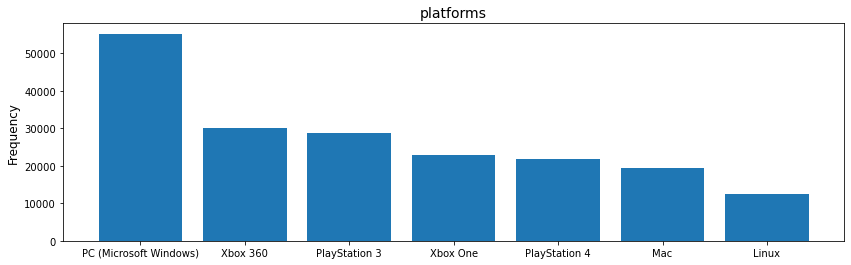

In [9]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
        to_1D(train["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

<AxesSubplot:xlabel='rating', ylabel='count'>

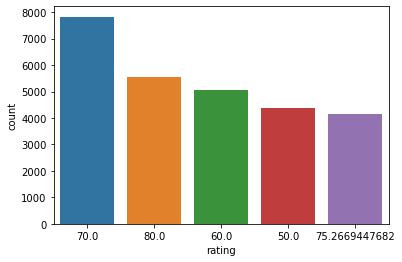

In [11]:
sns.countplot(x='rating', data=train, order=train.rating.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='rating_bin', ylabel='count'>

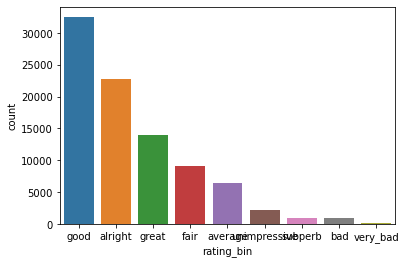

In [12]:
sns.countplot(x='rating_bin', data=train, order=train.rating_bin.value_counts().iloc[:9].index)

## Exploring `good rating`

In [13]:
df_good_rating = train[train['rating_bin']== 'good']
df_good_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
23551,3078,0,2013-10-21 21:16:24,"[13807, 74105, 82858, 90156, 93362, 93363, 935...",1.335744e+09,"[shooter, tactical]",Sniper Elite V2,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[6787, 6789, 12580, 105629, 143251, 143252, 33...","[494, 564, 1006, 3077, 5647, 7020, 8366, 9377,...",...,False,0,True,9.0,False,bc474aae-c001-91c1-1960-63066661414f,0,2,0,good
382218,572,0,2011-10-04 10:43:58,"[37676, 72907, 137515, 190175, 210035, 215243,...",1.245197e+09,"[shooter, simulator, strategy, tactical]",ArmA 2,[PC (Microsoft Windows)],[1299],"[241, 277, 343, 451, 564, 1294, 1881, 2942, 58...",...,False,0,True,6.0,False,b98380db-3bd7-46fb-5bd5-5aa0784c1806,0,4,0,good
194182,7696,0,2014-08-27 12:15:08,"[39541, 147091, 1871375]",5.995296e+08,"[point-and-click, adventure]",Manhunter: New York,"[DOS, Mac, Amiga, Atari ST/STE, Apple II, Appl...","[112938, 112939, 112940, 112941, 112942, 112943]","[7697, 13189, 13210, 18011, 25222, 25646, 3599...",...,False,0,False,NaN,False,None,0,0,0,good
402612,6043,0,2014-04-13 18:16:51,"[11465, 73299, 89711, 98662, 147772, 1919594, ...",1.087258e+09,[shooter],Shadow Ops: Red Mercury,"[PC (Microsoft Windows), Xbox]","[27965, 27966, 27967, 27968, 27969, 27970, 279...","[241, 316, 564, 908, 1294, 1372, 1842, 3201, 5...",...,True,0,False,11.0,True,169c879b-3b84-5e63-51e7-9310fb5897cd,2,0,0,good
414065,8908,0,2015-02-02 17:03:06,"[16575, 143945, 1719664, 1919909]",7.257600e+08,"[shooter, platform, adventure]",Alien 3,"[Commodore C64/128/MAX, Amiga, Nintendo Entert...","[26533, 26534, 26535, 26536, 26537, 26538, 216...","[18225, 25646, 55038, 56033, 57187, 68286, 103...",...,False,0,False,19.0,False,81b2e55b-d660-8680-966c-b03265de4799,0,0,0,good


Text(0.5, 1.0, 'platforms')

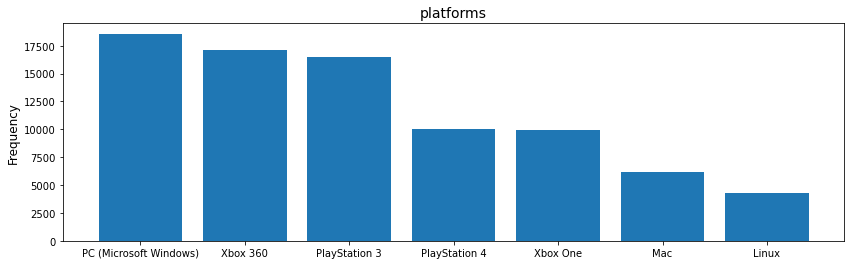

In [17]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [18]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",...,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",...,False,0,False,NaN,False,None,0,0,0,subperb


> ### Most frequent platforms in the raiting `subperb`

Text(0.5, 1.0, 'platforms')

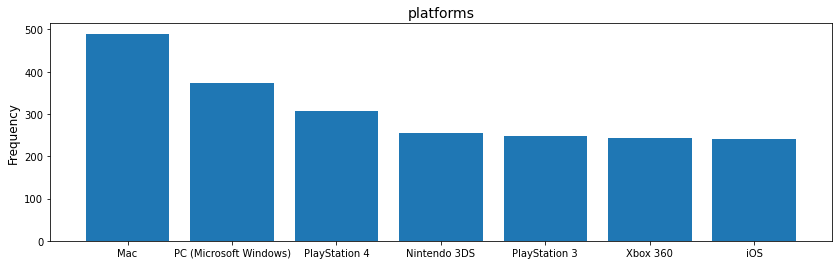

In [19]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [20]:
df_great_rating = train[train['rating_bin']== 'great']
df_great_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",...,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great
286357,27436,0,2017-02-28 19:05:26,"[75751, 218377, 1048606, 1594300, 1615407, 169...",1.544486e+09,"[role-playing-rpg, simulator, strategy, advent...",Kingdom Two Crowns,"[Linux, PC (Microsoft Windows), Mac, iOS, Play...","[161076, 161077, 161078, 161079, 161080, 31852...","[17548, 25311, 26145, 26574, 27092, 35994, 791...",...,True,0,False,130.0,True,7b20d3b9-73e4-08bb-b0f0-445e5dba1c22,2,0,0,great
64561,295,0,2011-03-17 08:45:25,"[37473, 156771, 247559]",8.486208e+08,"[real-time-strategy-rts, strategy]",Command & Conquer: Red Alert,"[PC (Microsoft Windows), PlayStation, PlayStat...","[173844, 178440, 178441, 178442, 178443, 17844...","[276, 649, 848, 959, 2040, 9363, 9538, 20776, ...",...,False,8,False,6.0,False,45f1ed05-6d40-4b8d-f42c-730db216f9d9,0,0,8,great


Text(0.5, 1.0, 'platforms')

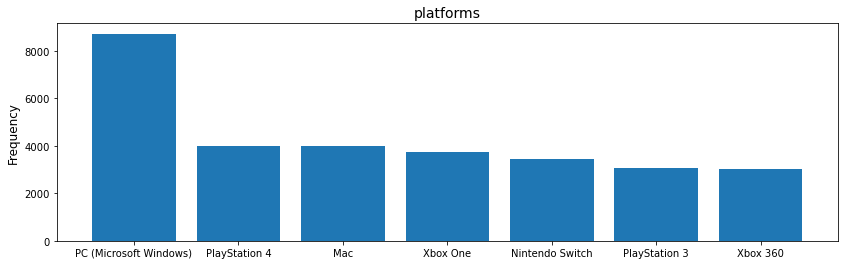

In [21]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [22]:

df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
df_top3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",...,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great


## These are the top 7 platforms for the three best ratings (good, great, subperb)

Text(0.5, 1.0, "Best rated games's platforms")

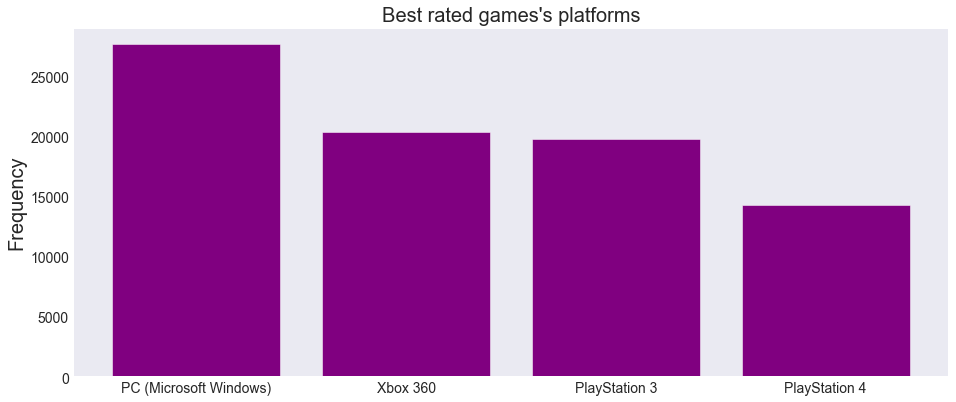

In [46]:
fig, ax = plt.subplots(figsize = (14,6))
sns.set_style("dark")
ax.bar(to_1D(df_top3_rating["platforms"]).value_counts().iloc[:4].index,
        to_1D(df_top3_rating["platforms"]).value_counts().iloc[:4].values,
          color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Best rated games's platforms", size = 20)

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - X-Box 360
    - ps 3 and 4 
    - X-box 1

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [39]:
df_low3_rating = df2[(df2['rating_bin']== 'bad') | (df2['rating_bin']== 'very bad') | (df2['rating_bin']== 'awful')]
df_low3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1909,30886,0,2017-05-23,"[2456, 1993129]",1.480982e+09,"[adventure, indie]",Time Of Silence,[PC (Microsoft Windows)],[73864],"[28277, 37419, 55282, 75948, 81275, 106992, 10...",...,False,0,False,NaN,False,None,0,0,0,bad


Text(0.5, 1.0, 'platforms')

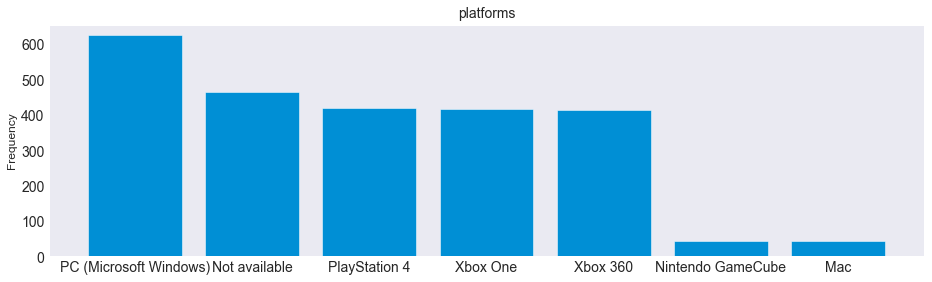

In [40]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [47]:
df_subperb_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",...,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",...,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 20914, 209...","[16, 21, 41, 43, 533, 571, 960, 1020, 1985, 2031]",...,False,0,False,NaN,False,None,0,0,0,subperb
350022,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349937,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
388383,6440,0,2014-04-25 09:48:13,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",...,False,0,True,37.0,False,ed1ef7e9-f817-f949-00bb-9fbc9a1f2b07,0,4,0,subperb
350134,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
420836,25358,0,2016-11-01 09:07:23,"[14912, 76955]",9.616320e+08,"[shooter, role-playing-rpg, adventure]",Deus Ex: Game of the Year Edition,[PC (Microsoft Windows)],[66779],"[25311, 55038, 76877, 96217, 103301, 105049, 1...",...,False,0,False,NaN,False,None,0,0,0,subperb


In [56]:
pd.set_option('display.max_columns', 500)
df_subperb_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",2022-07-11 11:30:50,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],None,None,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36,After fighting a losing battle with the raging...,92.221300,36,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,None,None,NaN,NaN,[7365],None,[86493],None,None,None,None,None,NaN,None,None,7365.0,False,False,False,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",gothic-ii-gold-edition,Gothic II: Gold Edition brings together the ex...,"[1, 17, 38, 268435468]",2022-09-25 09:56:26,https://www.igdb.com/games/gothic-ii-gold-edition,0b0d512e-1add-c724-d6a5-f69e9043c619,[27942],81332.0,"[47901, 99186]","[102680, 102681, 102682, 102683, 102684]",[single-player],[Third person],"[Action, Fantasy, Open world]","[26765, 26766, 118909, 140843]",None,[55855],[134],None,NaN,None,90.003422,5,None,90.003422,5,2262.0,Gold Edition,NaN,463.0,None,NaN,NaN,NaN,None,None,NaN,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",la-noire,L.A. Noire for PlayStation 4 and Xbox One deli...,"[1, 20, 22, 33, 38, 39, 43, 268435461, 2684354...",2022-09-22 13:55:14,https://www.igdb.com/games/la-noire,1db7b5e1-bc8b-cc45-e4b5-2f7b15aa5cf2,"[61480, 62001, 93238]",120996.0,[54124],"[141184, 141185, 141186, 141187, 146355]",[single-player],[Third person],"[Action, Thriller, Historical, Sandbox, Open w...",[56427],"[60591, 103643]","[46639, 46640]",None,"[1323, 1669, 4076, 4357, 16826, 16828, 16894, ...",NaN,"[16469, 16484]",92.990746,23,None,83.162040,29,NaN,None,1.0,NaN,None,15.0,73.333333,6.0,None,None,109.0,NaN,None,None,None,None,None,None,None,None,341.0,"At 9.45 in the morning, a thunderous explosio...","DLC: ""Nicholson Electroplating"" Arson Case",NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
418493,74,0,2011-02-18 09:01:17,"[14434, 80756, 86905, 137458, 213810, 245424, ...",1.264464e+09,"[shooter, role-playing-rpg, simulator, adventure]",Mass Effect 2,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[20909, 20910, 20911, 20912, 20913, 2091

Text(0.5, 1.0, 'Most common Genre in Superb Games')

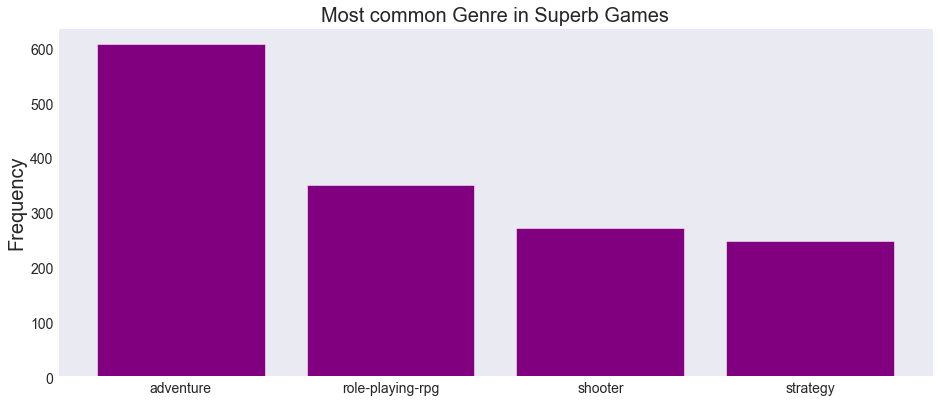

In [51]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

In [64]:
super_high_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
238245,14173,1,2015-10-22 20:27:31,None,1.072829e+09,[turn-based-strategy-tbs],Heroes of Might and Magic III: Horn of the Abyss,[PC (Microsoft Windows)],[197137],"[7615, 9472, 13196, 93694, 99118, 106104, 1111...",heroes-of-might-and-magic-iii-horn-of-the-abyss,Heroes of Might and Magic III: Horn of the Aby...,"[17, 268435472, 536871946, 536872059, 53687246...",2022-08-10 06:34:00,https://www.igdb.com/games/heroes-of-might-and...,75e4c77f-8b08-6cb7-90a6-6eb8dd908495,None,12745.0,[99879],None,"[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[5046, 5047]",[49693],None,None,"[1034, 1147, 1549, 2004]",NaN,None,99.264183,13,None,99.264183,13,NaN,None,3.0,194.0,[458],5.0,NaN,NaN,None,None,366.0,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
352643,138851,12,2020-09-15 01:13:40,[1998974],1.298938e+09,[music],Not In The Groove,[PC (Microsoft Windows)],[210626],"[31496, 63933, 77720, 84922, 86847, 87150, 110...",not-in-the-groove,"A rhythm game based on StepMania, In The Groov...","[268435463, 536871946, 536872476, 536872612, 5...",2022-01-14 23:10:25,https://www.igdb.com/games/not-in-the-groove,71fc1566-5699-0a21-35d8-9bfdfc44f68d,None,114716.0,None,None,"[single-player, multiplayer]",[Auditory],[Not available],[256486],"[49298, 56117]",None,None,"[1034, 1564, 1700, 12853, 20708]",NaN,None,99.033844,13,None,99.033844,13,NaN,None,1.0,NaN,None,10.0,NaN,NaN,None,None,144393.0,NaN,[11707],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
293733,72327,0,2017-09-30 00:54:38,"[73633, 119359, 1185935]",1.303344e+09,[hack-and-slash-beat-em-up],Streets of Rage Remake,[PC (Microsoft Windows)],[192346],"[1652, 1655, 3222, 14704, 21564, 22387, 27419,...",streets-of-rage-remake,Streets of Rage Remake is a fangame reboot on ...,"[1, 18, 268435481, 536870973, 536871029, 53687...",2022-08-12 18:32:15,https://www.igdb.com/games/streets-of-rage-remake,ac41a2ee-ef9b-afe5-5048-806bb775b597,None,130589.0,[95431],"[127037, 127038, 127039]","[single-player, multiplayer, co-operative]",[Not available],"[Action, Science fiction]",[137922],None,None,None,"[61, 117, 301, 939, 982, 1059, 1147, 1617, 200...",NaN,[34876],99.653129,8,None,99.653129,8,NaN,None,1.0,NaN,None,1.0,NaN,NaN,None,None,NaN,NaN,[14646],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
305852,122661,2,2019-09-30 18:02:49,None,1.569974e+09,[strategy],Gwent: Iron Judgment,[Xbox One],[176738],"[11407, 13196, 19404, 32510, 56967, 99118, 113...",gwent-iron-judgment,The North is on the rise and Radovid is back t...,"[17, 268435471, 536874083]",2022-06-26 15:17:40,https://www.igdb.com/games/gwent-iron-judgment,95911dcd-38ae-f9ce-631a-d4891df2f319,"[25968, 25969]",81851.0,[92867],"[361507, 361509, 361510, 361511, 361512, 361513]","[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[117340, 117341, 117342, 117343, 133387, 13338...",None,None,None,[3171],NaN,[30243],99.526142,6,None,99.526142,6,NaN,None,NaN,62.0,[452],1.0,NaN,NaN,None,None,19474.0,NaN,None,None,None,None,None,None,N

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

Text(0.5, 1.0, 'Most common themes in superb games')

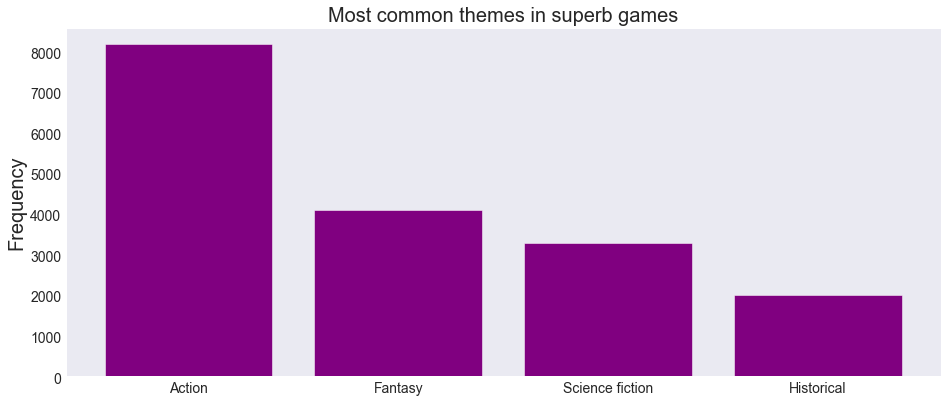

In [55]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_great_rating["themes"]).value_counts().iloc[:4].index,
        to_1D(df_great_rating["themes"]).value_counts().iloc[:4].values,
           color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common themes in superb games", size = 20)

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

Text(0.5, 1.0, 'Themes')

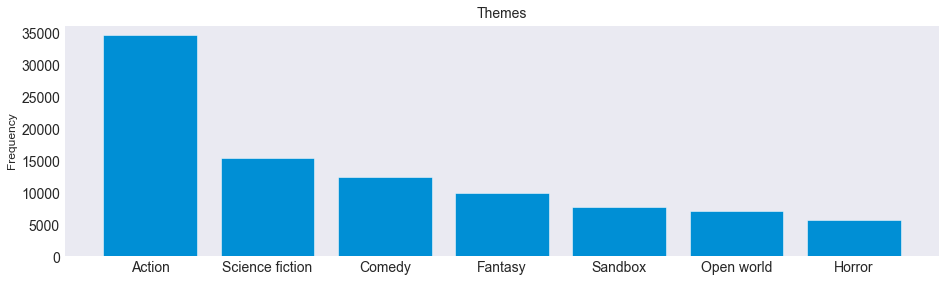

In [65]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

Text(0.5, 1.0, 'Themes')

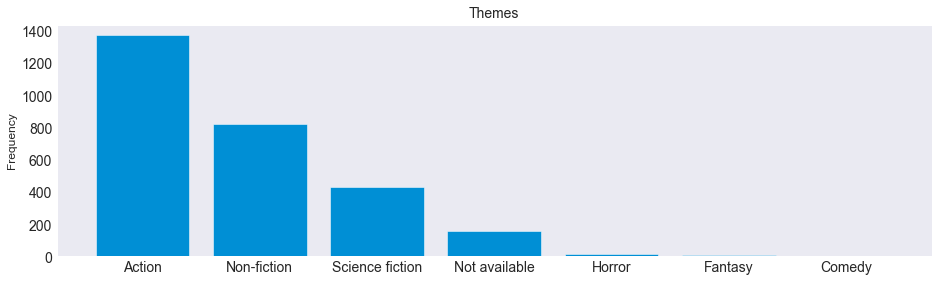

In [66]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",far-cry-3,Beyond the reach of civilization lies a lawles...,"[1, 21, 23, 33, 38, 268435461, 268435487, 5368...",2022-09-25 12:30:48,https://www.igdb.com/games/far-cry-3,3fc48753-db94-0ea3-732d-7bd761a24a11,"[1154, 5229, 69029]",87745.0,"[3939, 75598, 75599]","[1282, 1283, 1284, 1285, 6458]","[single-player, multiplayer, co-operative]",[First person],"[Action, Survival, Stealth, Sandbox, Open world]","[21494, 41214, 41215, 41216, 66679, 222807, 22...","[35647, 35648, 35649, 35650, 35651, 50193]","[2858, 2859, 2860, 2861, 2862, 2863, 2864, 286...",[118],"[64, 72, 121, 129, 132, 154, 222, 271, 301, 33...",NaN,"[3087, 3088, 3089, 67707]",83.637224,1561,None,86.585279,1577,NaN,None,NaN,103.0,None,681.0,89.533333,16.0,None,"[100668, 121160, 136783, 163874, 188049]",NaN,NaN,[859],None,[86389],None,None,None,None,[2001],NaN,None,None,859.0,False,False,False,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great
23551,3078,0,2013-10-21 21:16:24,"[13807, 74105, 82858, 90156, 93362, 93363, 935...",1.335744e+09,"[shooter, tactical]",Sniper Elite V2,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[6787, 6789, 12580, 105629, 143251, 143252, 33...","[494, 564, 1006, 3077, 5647, 7020, 8366, 9377,...",sniper-elite-v2,Sniper Elite V2 is the eagerly-awaited sequel ...,"[1, 22, 23, 39, 268435461, 268435480, 53687093...",2022-09-15 13:27:07,https://www.igdb.com/games/sniper-elite-v2,26c303bb-86de-da25-64fd-fd163b2405c2,"[1108, 52750]",111601.0,"[37229, 37230]","[4143, 4144, 4145, 8878, 8879, 172803, 172804,...","[single-player, multiplayer, co-operative]",[Third person],"[Action, Historical, Stealth, Warfare]","[19275, 19276, 19277, 45630, 45631, 66899]",None,[27725],[36],"[19, 124, 132, 276, 897, 1025, 1158, 1219, 129...",NaN,"[1637, 8768, 8769]",71.178674,168,"The main character is Karl Fairburne, an OSS o...",69.043882,181,NaN,None,NaN,559.0,None,57.0,66.909091,13.0,"[10878, 10879, 10880, 10881]",None,NaN,NaN,[835],None,None,None,None,[116191],None,None,NaN,None,None,835.0,True,False,False,False,0,True,9.0,False,bc474aae-c001-91c1-1960-63066661414f,0,2,0,good
125340,114455,0,2019-01-26 15:16:14,"[1703979, 1711504, 1744994]",1.550794e+09,"[strategy, adventure, indie]",Pacify,"[PC (Microsoft Windows), Mac]","[164848, 164849]","[11668, 13189, 18020, 19817, 25311, 25646, 359...",pacify,"An indie, multiplayer, horror game with fast p...","[1, 19, 268435471, 268435487, 268435488, 53687...",2022-06-23 22:55:15,https://www.igdb.com/games/pacify,21dc764c-592a-2724-f01f-2ed4baa4a280,None,71287.0,"[73952, 73956, 73957]","[282044, 282045, 282046, 282047, 282048, 28204...","[single-player, multiplayer, co-operative]",[First person],"[Action, Horror]","[99347, 99348, 99349, 99350, 99351, 99352, 99353]",None,[32650],[439],"[131, 135, 1120, 1473, 1836, 2653, 2938, 3747]",NaN,[24532],54.523274,49,You just signed on with PAH Inc. Paranormal Ac...,54.523274,49,NaN,None,21.0,NaN,None,71.

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [ ]:
df2.head(2)

>## Not online multi

In [ ]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [ ]:
train.onlinecoop.value_counts()

In [ ]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

In [ ]:
NOT_online_multi.head()

In [ ]:
NOT_online_multi.first_release_date.value_counts()

In [ ]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

In [ ]:
NOT_online_multi.head()

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [ ]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

## Not online multi-player that games are after 1981

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [ ]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

## Games that are after 1981 - Ratings 

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

In [68]:
train.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",far-cry-3,Beyond the reach of civilization lies a lawles...,"[1, 21, 23, 33, 38, 268435461, 268435487, 5368...",2022-09-25 12:30:48,https://www.igdb.com/games/far-cry-3,3fc48753-db94-0ea3-732d-7bd761a24a11,"[1154, 5229, 69029]",87745.0,"[3939, 75598, 75599]","[1282, 1283, 1284, 1285, 6458]","[single-player, multiplayer, co-operative]",[First person],"[Action, Survival, Stealth, Sandbox, Open world]","[21494, 41214, 41215, 41216, 66679, 222807, 22...","[35647, 35648, 35649, 35650, 35651, 50193]","[2858, 2859, 2860, 2861, 2862, 2863, 2864, 286...",[118],"[64, 72, 121, 129, 132, 154, 222, 271, 301, 33...",NaN,"[3087, 3088, 3089, 67707]",83.637224,1561,None,86.585279,1577,NaN,None,NaN,103.0,None,681.0,89.533333,16.0,None,"[100668, 121160, 136783, 163874, 188049]",NaN,NaN,[859],None,[86389],None,None,None,None,[2001],NaN,None,None,859.0,False,False,False,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great
23551,3078,0,2013-10-21 21:16:24,"[13807, 74105, 82858, 90156, 93362, 93363, 935...",1.335744e+09,"[shooter, tactical]",Sniper Elite V2,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[6787, 6789, 12580, 105629, 143251, 143252, 33...","[494, 564, 1006, 3077, 5647, 7020, 8366, 9377,...",sniper-elite-v2,Sniper Elite V2 is the eagerly-awaited sequel ...,"[1, 22, 23, 39, 268435461, 268435480, 53687093...",2022-09-15 13:27:07,https://www.igdb.com/games/sniper-elite-v2,26c303bb-86de-da25-64fd-fd163b2405c2,"[1108, 52750]",111601.0,"[37229, 37230]","[4143, 4144, 4145, 8878, 8879, 172803, 172804,...","[single-player, multiplayer, co-operative]",[Third person],"[Action, Historical, Stealth, Warfare]","[19275, 19276, 19277, 45630, 45631, 66899]",None,[27725],[36],"[19, 124, 132, 276, 897, 1025, 1158, 1219, 129...",NaN,"[1637, 8768, 8769]",71.178674,168,"The main character is Karl Fairburne, an OSS o...",69.043882,181,NaN,None,NaN,559.0,None,57.0,66.909091,13.0,"[10878, 10879, 10880, 10881]",None,NaN,NaN,[835],None,None,None,None,[116191],None,None,NaN,None,None,835.0,True,False,False,False,0,True,9.0,False,bc474aae-c001-91c1-1960-63066661414f,0,2,0,good
125340,114455,0,2019-01-26 15:16:14,"[1703979, 1711504, 1744994]",1.550794e+09,"[strategy, adventure, indie]",Pacify,"[PC (Microsoft Windows), Mac]","[164848, 164849]","[11668, 13189, 18020, 19817, 25311, 25646, 359...",pacify,"An indie, multiplayer, horror game with fast p...","[1, 19, 268435471, 268435487, 268435488, 53687...",2022-06-23 22:55:15,https://www.igdb.com/games/pacify,21dc764c-592a-2724-f01f-2ed4baa4a280,None,71287.0,"[73952, 73956, 73957]","[282044, 282045, 282046, 282047, 282048, 28204...","[single-player, multiplayer, co-operative]",[First person],"[Action, Horror]","[99347, 99348, 99349, 99350, 99351, 99352, 99353]",None,[32650],[439],"[131, 135, 1120, 1473, 1836, 2653, 2938, 3747]",NaN,[24532],54.523274,49,You just signed on with PAH Inc. Paranormal Ac...,54.523274,49,NaN,None,21.0,NaN,None,71.

Text(0.5, 1.0, 'platforms')

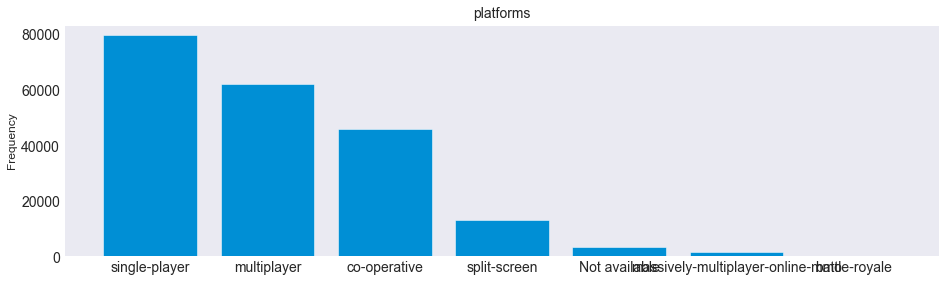

In [69]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["game_modes"]).value_counts().iloc[:7].index,
        to_1D(train["game_modes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- looks liek most common games are single and multi player, and co op 

Text(0.5, 1.0, 'Most common Genre in Superb Games')

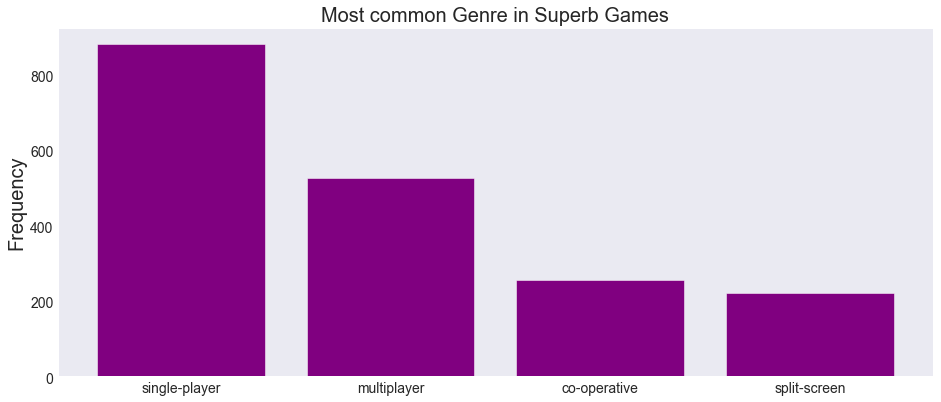

In [70]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

- didnt find anything important

In [71]:
train.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",far-cry-3,Beyond the reach of civilization lies a lawles...,"[1, 21, 23, 33, 38, 268435461, 268435487, 5368...",2022-09-25 12:30:48,https://www.igdb.com/games/far-cry-3,3fc48753-db94-0ea3-732d-7bd761a24a11,"[1154, 5229, 69029]",87745.0,"[3939, 75598, 75599]","[1282, 1283, 1284, 1285, 6458]","[single-player, multiplayer, co-operative]",[First person],"[Action, Survival, Stealth, Sandbox, Open world]","[21494, 41214, 41215, 41216, 66679, 222807, 22...","[35647, 35648, 35649, 35650, 35651, 50193]","[2858, 2859, 2860, 2861, 2862, 2863, 2864, 286...",[118],"[64, 72, 121, 129, 132, 154, 222, 271, 301, 33...",NaN,"[3087, 3088, 3089, 67707]",83.637224,1561,None,86.585279,1577,NaN,None,NaN,103.0,None,681.0,89.533333,16.0,None,"[100668, 121160, 136783, 163874, 188049]",NaN,NaN,[859],None,[86389],None,None,None,None,[2001],NaN,None,None,859.0,False,False,False,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great
23551,3078,0,2013-10-21 21:16:24,"[13807, 74105, 82858, 90156, 93362, 93363, 935...",1.335744e+09,"[shooter, tactical]",Sniper Elite V2,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[6787, 6789, 12580, 105629, 143251, 143252, 33...","[494, 564, 1006, 3077, 5647, 7020, 8366, 9377,...",sniper-elite-v2,Sniper Elite V2 is the eagerly-awaited sequel ...,"[1, 22, 23, 39, 268435461, 268435480, 53687093...",2022-09-15 13:27:07,https://www.igdb.com/games/sniper-elite-v2,26c303bb-86de-da25-64fd-fd163b2405c2,"[1108, 52750]",111601.0,"[37229, 37230]","[4143, 4144, 4145, 8878, 8879, 172803, 172804,...","[single-player, multiplayer, co-operative]",[Third person],"[Action, Historical, Stealth, Warfare]","[19275, 19276, 19277, 45630, 45631, 66899]",None,[27725],[36],"[19, 124, 132, 276, 897, 1025, 1158, 1219, 129...",NaN,"[1637, 8768, 8769]",71.178674,168,"The main character is Karl Fairburne, an OSS o...",69.043882,181,NaN,None,NaN,559.0,None,57.0,66.909091,13.0,"[10878, 10879, 10880, 10881]",None,NaN,NaN,[835],None,None,None,None,[116191],None,None,NaN,None,None,835.0,True,False,False,False,0,True,9.0,False,bc474aae-c001-91c1-1960-63066661414f,0,2,0,good
125340,114455,0,2019-01-26 15:16:14,"[1703979, 1711504, 1744994]",1.550794e+09,"[strategy, adventure, indie]",Pacify,"[PC (Microsoft Windows), Mac]","[164848, 164849]","[11668, 13189, 18020, 19817, 25311, 25646, 359...",pacify,"An indie, multiplayer, horror game with fast p...","[1, 19, 268435471, 268435487, 268435488, 53687...",2022-06-23 22:55:15,https://www.igdb.com/games/pacify,21dc764c-592a-2724-f01f-2ed4baa4a280,None,71287.0,"[73952, 73956, 73957]","[282044, 282045, 282046, 282047, 282048, 28204...","[single-player, multiplayer, co-operative]",[First person],"[Action, Horror]","[99347, 99348, 99349, 99350, 99351, 99352, 99353]",None,[32650],[439],"[131, 135, 1120, 1473, 1836, 2653, 2938, 3747]",NaN,[24532],54.523274,49,You just signed on with PAH Inc. Paranormal Ac...,54.523274,49,NaN,None,21.0,NaN,None,71.

# Question - What are the top 5 most highest member rated videogames?

In [72]:
super_high_rating = df_subperb_rating[df_subperb_rating['rating'] > 99]

In [73]:
super_high_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,aggregated_rating,aggregated_rating_count,dlcs,bundles,parent_game,franchise,multiplayer_modes,remakes,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
238245,14173,1,2015-10-22 20:27:31,None,1.072829e+09,[turn-based-strategy-tbs],Heroes of Might and Magic III: Horn of the Abyss,[PC (Microsoft Windows)],[197137],"[7615, 9472, 13196, 93694, 99118, 106104, 1111...",heroes-of-might-and-magic-iii-horn-of-the-abyss,Heroes of Might and Magic III: Horn of the Aby...,"[17, 268435472, 536871946, 536872059, 53687246...",2022-08-10 06:34:00,https://www.igdb.com/games/heroes-of-might-and...,75e4c77f-8b08-6cb7-90a6-6eb8dd908495,None,12745.0,[99879],None,"[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[5046, 5047]",[49693],None,None,"[1034, 1147, 1549, 2004]",NaN,None,99.264183,13,None,99.264183,13,NaN,None,3.0,194.0,[458],5.0,NaN,NaN,None,None,366.0,NaN,None,None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
352643,138851,12,2020-09-15 01:13:40,[1998974],1.298938e+09,[music],Not In The Groove,[PC (Microsoft Windows)],[210626],"[31496, 63933, 77720, 84922, 86847, 87150, 110...",not-in-the-groove,"A rhythm game based on StepMania, In The Groov...","[268435463, 536871946, 536872476, 536872612, 5...",2022-01-14 23:10:25,https://www.igdb.com/games/not-in-the-groove,71fc1566-5699-0a21-35d8-9bfdfc44f68d,None,114716.0,None,None,"[single-player, multiplayer]",[Auditory],[Not available],[256486],"[49298, 56117]",None,None,"[1034, 1564, 1700, 12853, 20708]",NaN,None,99.033844,13,None,99.033844,13,NaN,None,1.0,NaN,None,10.0,NaN,NaN,None,None,144393.0,NaN,[11707],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
293733,72327,0,2017-09-30 00:54:38,"[73633, 119359, 1185935]",1.303344e+09,[hack-and-slash-beat-em-up],Streets of Rage Remake,[PC (Microsoft Windows)],[192346],"[1652, 1655, 3222, 14704, 21564, 22387, 27419,...",streets-of-rage-remake,Streets of Rage Remake is a fangame reboot on ...,"[1, 18, 268435481, 536870973, 536871029, 53687...",2022-08-12 18:32:15,https://www.igdb.com/games/streets-of-rage-remake,ac41a2ee-ef9b-afe5-5048-806bb775b597,None,130589.0,[95431],"[127037, 127038, 127039]","[single-player, multiplayer, co-operative]",[Not available],"[Action, Science fiction]",[137922],None,None,None,"[61, 117, 301, 939, 982, 1059, 1147, 1617, 200...",NaN,[34876],99.653129,8,None,99.653129,8,NaN,None,1.0,NaN,None,1.0,NaN,NaN,None,None,NaN,NaN,[14646],None,None,None,None,None,None,None,NaN,None,None,NaN,False,False,False,False,0,False,NaN,False,None,0,0,0,subperb
305852,122661,2,2019-09-30 18:02:49,None,1.569974e+09,[strategy],Gwent: Iron Judgment,[Xbox One],[176738],"[11407, 13196, 19404, 32510, 56967, 99118, 113...",gwent-iron-judgment,The North is on the rise and Radovid is back t...,"[17, 268435471, 536874083]",2022-06-26 15:17:40,https://www.igdb.com/games/gwent-iron-judgment,95911dcd-38ae-f9ce-631a-d4891df2f319,"[25968, 25969]",81851.0,[92867],"[361507, 361509, 361510, 361511, 361512, 361513]","[single-player, multiplayer]",[Bird view / Isometric],[Fantasy],"[117340, 117341, 117342, 117343, 133387, 13338...",None,None,None,[3171],NaN,[30243],99.526142,6,None,99.526142,6,NaN,None,NaN,62.0,[452],1.0,NaN,NaN,None,None,19474.0,NaN,None,None,None,None,None,None,N

In [ ]:
# 4

In [74]:
train.player_perspectives.value_counts()

[Third person]                                                                     23547
[Not available]                                                                    17621
[Bird view / Isometric]                                                            13570
[Side view]                                                                        12653
[First person]                                                                      8729
[First person, Third person]                                                        3166
[Bird view / Isometric, Side view]                                                  3073
[Third person, Bird view / Isometric]                                               2224
[First person, Virtual Reality]                                                     1234
[Third person, Side view]                                                           1002
[Virtual Reality]                                                                    639
[First person, Third 

Text(0.5, 1.0, 'Most common Genre in Superb Games')

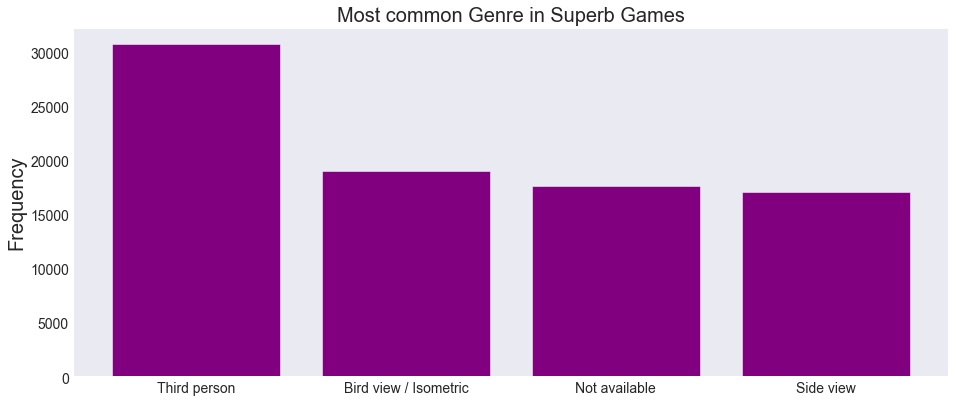

In [75]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(train["player_perspectives"]).value_counts().iloc[:4].index,
        to_1D(train["player_perspectives"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
ax.bar(to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].index,
        to_1D(df_subperb_rating["game_modes"]).value_counts().iloc[:4].values,
         color= ['purple'])
ax.set_ylabel("Frequency", size = 20)
ax.set_title("Most common Genre in Superb Games", size = 20)

# preparing for modeling the data pt 2

In [ ]:
genres_dict

In [ ]:
# loop through genres list

In [ ]:
# list of genres to add
items = ['point-and-click', 'fighting', 'shooter', 'music', 'platform', 'puzzle', 'racing', 'real-time-strategy-rts', 'role-playing-rpg', 'simulator', 'sport', 'strategy', 'turn-based-strategy-tbs', 'tactical', 'hack-and-slash-beat-em-up', 'quiz-trivia', 'pinball', 'adventure', 'indie', 'arcade', 'visual-novel', 'card-and-board-game', 'moba']
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for item in items:
    game_library[item] = game_library['genres'].apply(my_list, word=item)

In [ ]:

game_library.head()

In [ ]:
platform_dict

In [ ]:
# Adding platforms to game_library

In [ ]:
# list of platformd to add
platforms = ['Linux', 'Nintendo 64', 'Wii', 'PC (Microsoft Windows)', 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'Xbox', 'Xbox 360', 'DOS', 'Mac', 'Nintendo Entertainment System', 'Super Nintendo Entertainment System', 'Nintendo DS', 'Nintendo GameCube', 'Game Boy Color', 'Game Boy Advance', 'Sega Mega Drive/Genesis','Sega Saturn', 'Game Boy', 'Android', 'Nintendo 3DS','PlayStation Portable', 'iOS', 'Wii U', 'PlayStation Vita', 'Virtual Console (Nintendo)', 'PlayStation 4', 'Xbox One', 'Family Computer Disk System', 'Arcade', 'Windows Phone', 'Apple II', 'Web browser', 'Odyssey', 'Commodore 16', 'New Nintendo 3DS']


In [ ]:
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for platform in platforms:
    game_library[platform] = game_library['platforms'].apply(my_list, word=platform)

In [ ]:
game_library.head()

## Add theams to game library

In [ ]:
themes = ['Thriller', 'Science fiction', 'Action', 'Horror', 'Survival', 'Fantasy', 'Historical', 'Stealth', 'Comedy', 'Business', 'Drama', 'Non-fiction', 'Kids', 'Sandbox', 'Open world', 'Warfare', 'Educational', 'Mystery', 'Party', 'Romance', 'Erotic']

def my_list_themes(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for theme in themes:
    game_library[theme] = game_library['themes'].apply(my_list_themes, word=theme)

In [ ]:
game_library.head()

## Add player perspective

In [ ]:
players = ['First person', 'Third person', 'Bird view / Isometric', 'Text', 'Side view', 'Virtual Reality', 'Auditory'  'Drama']

def my_list_player(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for player in players:
    game_library[player] = game_library['player_perspectives'].apply(my_list_player, word=player)


In [ ]:
game_library.head()

## Add game modes

In [ ]:
modes = ['single-player', 'multiplayer', 'co-operative', 'split-screen', 'massively-multiplayer-online-mmo', 'battle-royale']

def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for mode in modes:
    game_library[mode] = game_library['player_perspectives'].apply(my_list, word=mode)

## turn dlc column into boolean column


In [ ]:
game_library['dlcs'] = game_library['dlcs'].fillna(0)
game_library.head()

In [ ]:
def dlcs_col(df):
    game_library['has_dlcs'] = np.where(game_library.dlcs == 0, 1, 0)  
    return df

In [ ]:
game_library = dlcs_col(game_library)

In [ ]:
game_library.has_dlcs.head()

In [ ]:
game_library = game_library.drop(columns=['websites', 'collection', 'external_games', 'updated_at', 'artworks', 'genres', 'platforms', 'similar_games', 'tags', 'release_dates', 'cover','screenshots', 'videos', 'checksum_x', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'url', 'franchises', 'follows', 'aggregated_rating_count', 'game_modes', 'player_perspectives', 'themes', 'game_engines', 'keywords', 'storyline', 'version_title', 'follows', 'bundles', 'franchise', 'checksum_y', 'second_id', 'offlinecoopmax', 'onlinecoopmax', 'onlinecoopmax'])
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['remasters', 'summary', 'age_ratings', 'involved_companies', 'status', 'aggregated_rating', 'total_rating', 'remakes', 'ports', 'parent_game', 'aggregated_rating', 'multiplayer_modes', 'expansions', 'expanded_games', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version'])

In [ ]:
game_library.head()

In [ ]:
game_library['rating_bin'] = pd.cut(game_library.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])

In [ ]:

game_library.slug.head()


In [ ]:
game_library = game_library.drop(columns=['platform'])
game_library.shape


In [ ]:
game_library.shape

In [ ]:
game_library.head()

In [ ]:
game_library = game_library.drop(columns=['name'])


In [ ]:
game_library['slug'] = game_library['slug'].str.replace('-',' ')


In [ ]:
#game_library["slug"] = pd.to_numeric(game_library["slug"], downcast="float")

## Dataframe with ratings

In [ ]:
game_library.campaigncoop.value_counts()

In [ ]:
game_library.dropin.value_counts()

In [ ]:
game_ratings = pd.read_json("game_ratings.json")

In [ ]:
game_ratings

In [ ]:
game_ratings = game_library[game_library['rating_bin'].notnull()]
game_ratings.shape

In [ ]:
game_ratings.slug.info()


In [ ]:
game_ratings

In [ ]:
game_ratings = game_ratings.drop(columns=['slug'])


In [ ]:
game_ratings_df = game_ratings.to_json(orient='index')
print(game_ratings_df)

In [ ]:
print(game_ratings_df)

In [ ]:
def split(game_ratings, stratify_by='rating_bin'):
    # split df into train_validate 
    train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    X_train = train.drop(columns=['rating_bin'])
    y_train = train[['rating_bin']]

    X_validate = validate.drop(columns=['rating_bin'])
    y_validate = validate[['rating_bin']]

    X_test = test.drop(columns=['rating_bin'])
    y_test = test[['rating_bin']]

    return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(game_ratings, stratify_by='rating') #split data
train.head()


In [ ]:
import os
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [ ]:
def feature_chi2(X_train, X_validate, X_test, y_train, k = 21):
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_validate_fs = X_validate.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_validate_fs, X_test_fs

In [ ]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, y_train, k = 21) # fitting the df to the function 
X_train_fs.head()

In [ ]:
# def split(game_ratings, stratify_by='rating_bin'):
#     # split df into train_validate 
#     train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
#     train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

#     X_train = train.drop(columns=['rating_bin'])
#     y_train = train[['rating_bin']]

#     X_validate = validate.drop(columns=['rating_bin'])
#     y_validate = validate[['rating_bin']]

#     X_test = test.drop(columns=['rating_bin'])
#     y_test = test[['rating_bin']]

#     return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=8)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()



In [ ]:
def replace_boolean(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_boolean(test)

In [ ]:
df3 = game_library[game_library['rating'].isnull()]
df3.shape

### Read the CSV for games 

In [ ]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['websites', 'created_at', 'updated_at', 'artworks', 'cover','screenshots', 'videos', 'checksum', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'franchises', 'follows', 'aggregated_rating_count'])
game_library.shape

In [ ]:
game_library.shape

In [ ]:
game_library.rename(columns={'slug': 'lower_case_name', 'aggregated_rating': 'critic_rating'}, inplace=True)
game_library.head()

### Dataframe with ratings

In [ ]:
df2 = df[df['rating'].notnull()]
df2.head()

In [ ]:
df2.rating.isnull().sum()

### Dataframe with nulls in rating column 

In [ ]:
df3 = df[df['rating'].isnull()]
df3.shape